## On the Responsible use of Pseudo-Random Number Generators in Scientific Research

### Notebook by: [crahal](https://github.com/crahal/).

### Last modified: 19.08.2024

### Section 0

Lets first load in some dependancies. Note, all the plotting functions can be found in `./src/helper_figure_plotters.py`. The data lives as outputs from other scripts in `./src`, and invariably pulls in results from `./data/`. Figures get _output_ to `figure_path`, defined below. As always, we rely heavily on `pandas`.

In [1]:
import os
import json
import zipfile
import warnings
import pandas as pd
from helper_figure_plotters import load_sympt,\
                                   plot_predictions,\
                                   plot_mvprobit,\
                                   plot_four_simple_examples,\
                                   plot_collisions,\
                                   plot_topics_barplot,\
                                   plot_ffc, plot_three_rws,\
                                   plot_further_examples,\
                                   load_scientometrics,\
                                   desc_print_scientometrics,\
                                   make_table,\
                                   make_scientometric_ts,\
                                   plot_scientometrics
warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

### Section 1

Lets first load in our most simple example: draws from rnorms.

In [2]:
file_path_100 = os.path.join(os.getcwd(),
                             '..',
                             'data',
                             'rnom',
                             'rnom_samples100_seeds100000_results'
                            )
with zipfile.ZipFile(file_path_100 + '.zip', 'r') as zip_ref:
    file_names = zip_ref.namelist()
    print("Files in the zip:", file_names)  # Print to check the correct file name
    json_file_name = file_names[0]  # Adjust the index if necessary
    with zip_ref.open(json_file_name) as file:
        data_dict_100 = json.load(file)

print(f"The minimum mean value is: {data_dict_100['min_val']}")
print(f"The maximum mean value is: {data_dict_100['max_val']}")

Files in the zip: ['rnom_samples100_seeds100000_results.json']
The minimum mean value is: -0.4317892661417437
The maximum mean value is: 0.415586882007415


#### Section 1.1

Lets plot the results from four simple simulation examples, which are grouped together into what is probably 'Figure 1' in the accompanying academic paper. The four examples are:

* 'a.': The number of "Infected" people in a Susceptible, Infected, Recovered (SIR) model.
* 'b.': Replicating buffon's needle experiment with different seeds.
* 'c.': Estimating the number of collisions within a 32-bit Mersenne Twister implementation.
    - This is loosely based on work of Hofert (2020, The American Statisician), available [here](https://arxiv.org/abs/2003.08009v2).
* 'd.': A stochastic Solow growth model, visualising output and capital stock

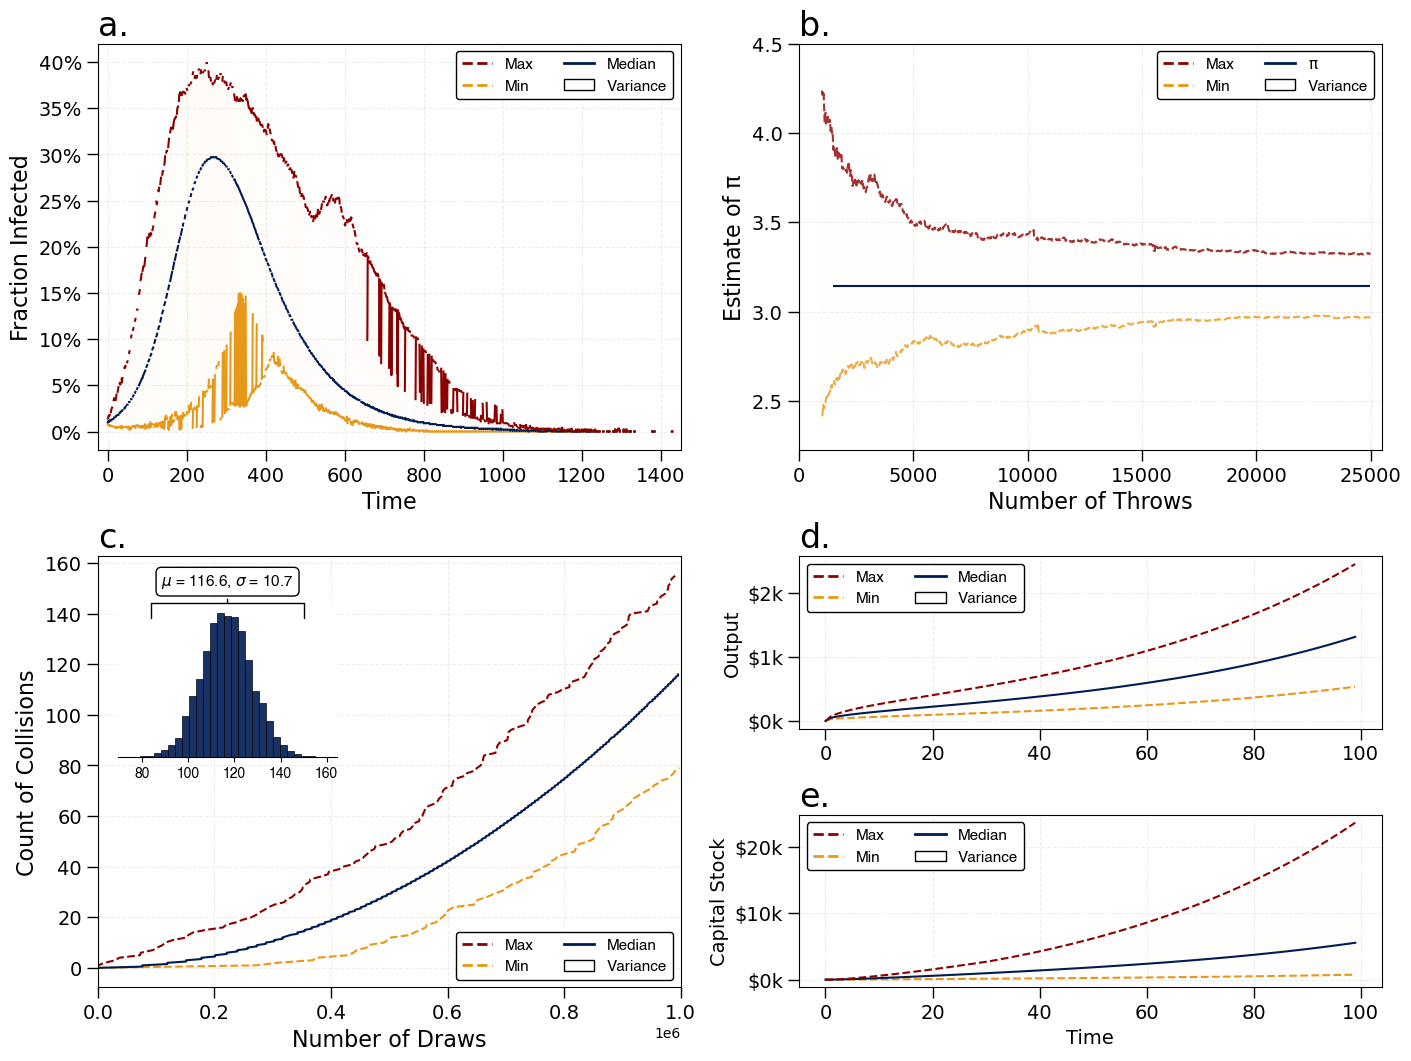

In [3]:
plot_four_simple_examples(figure_path)

#### Section 2: Machine and Deep Learning Examples

Lets now move on from these simple simulations to consider some more elaborate replications, all of different shapes and sizes. First, lets load in the predictions generated on the [SAIL](https://saildatabank.com/) VM with the symptomtracker data. It loosely repicates Menni et al. (2020, Nature Medicine), available [here](https://www.nature.com/articles/s41591-020-0916-2) (Subfigure 'a.', below). The second subfigure looks at a pedagogical house price example, and the third is an example of the titanic taken from [Domingue et al. (2021)](https://scholar.google.com/scholar?oi=bibs&cluster=12572767983256291545&btnI=1&hl=en). Examples 'b.' and 'c.' use random forests which decompose error into 'folding' and 'modelling' error. The final example 'd.' uses the MNIST datasaet and a convolutional neural networks:

* Detection of Covid using logistic regressions (seed variation comes from folding)    
* A simple, more teaching-orientated example; predicting house prices (seed variation comes from folding and modelling)
* Classifying survival on the titanic (seed variation comes from folding and modelling)
* Computer Vision example with a convolutional neural network; recognising MNIST characters (seed variation comes from modelling)

In [19]:
filename = 'roc_auc_full_firstwave_5folds_10kseeds_stratified.csv'
first_wave_10k_stratified_list = load_sympt(filename)

Covid min:  0.6706358899202085
Covid max:  0.8123153511526741
Covid mean:  0.7430775679453714
Housing min:  0.6259669174326825
Housing max:  0.679262781306009
Housing mean:  0.6552828234726009
Titanic min:  0.1085
Titanic max:  0.384
Titanic mean:  0.26616470029999995
MNIST min:  9001
MNIST max:  9728
MNIST mean:  9623.3025


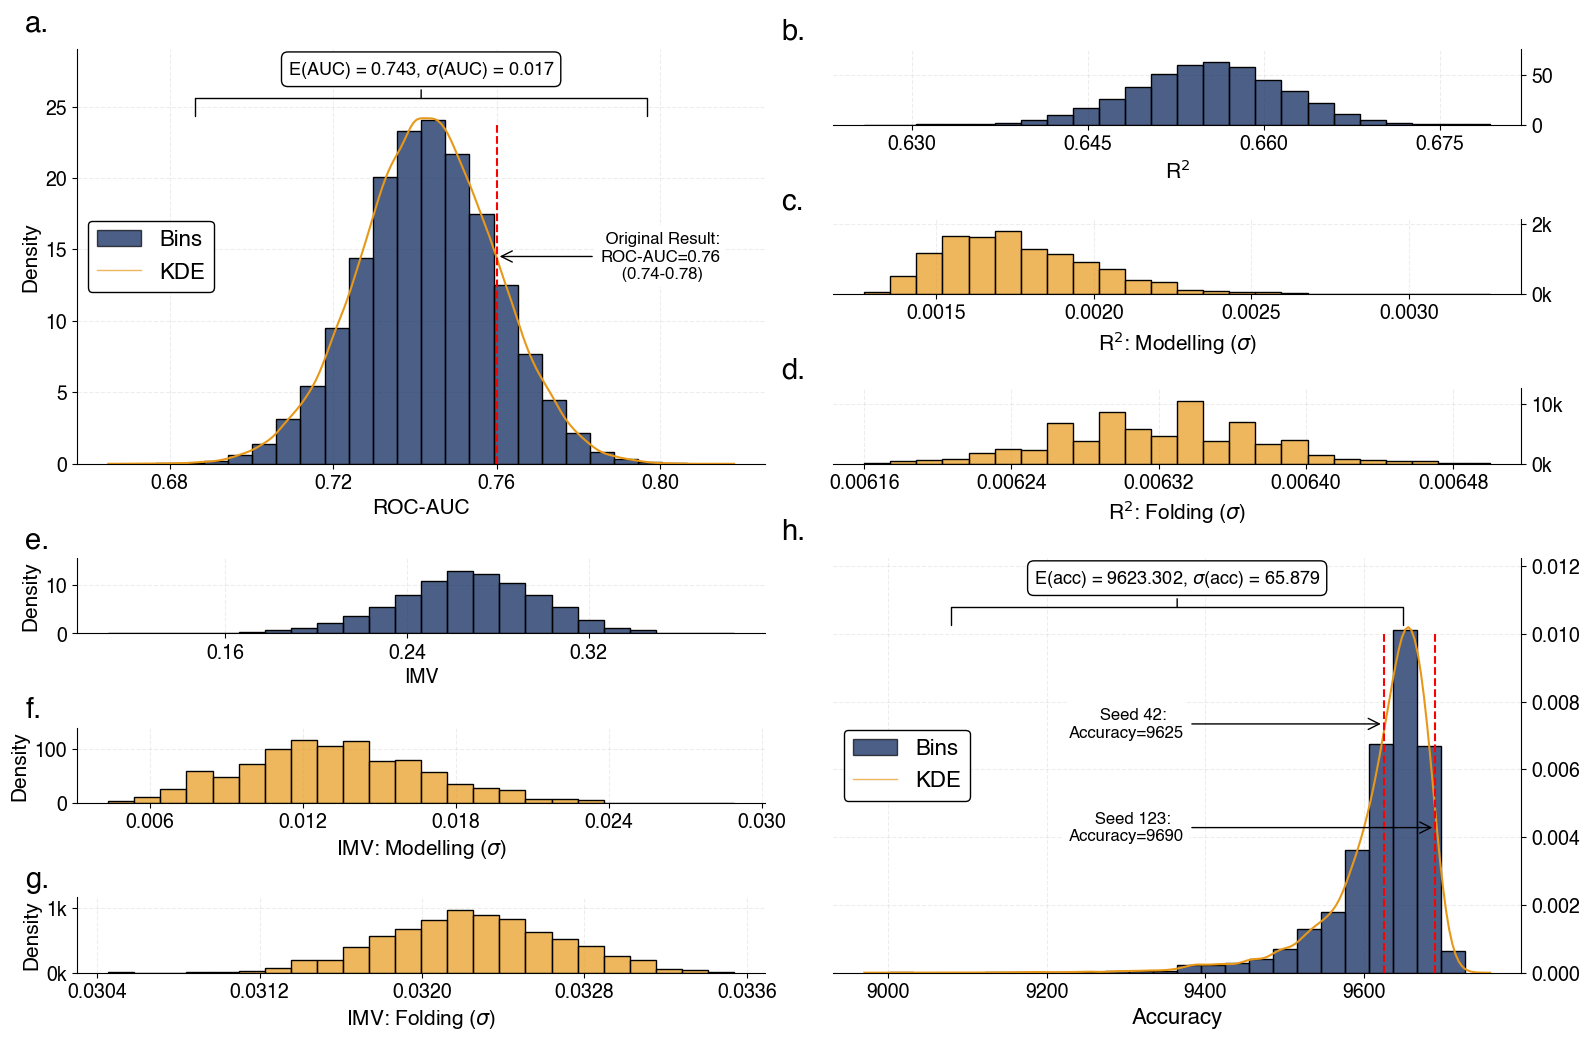

In [20]:
plot_predictions(first_wave_10k_stratified_list, figure_path)

### Section 3: Applied Social and Health Examples

#### Section 3.1.

Now lets move on to a more familiar statistical\econometric example. This is based on the `mvprobit` Stata package of Cappellari and Jenkins (2003, The Stata Journal), available [here](https://journals.sagepub.com/doi/pdf/10.1177/1536867X0300300305). From Mark Verhagen:

```
In a mvprobit you model, there is an M-dimensional vector of outcomes by specifying M equations with to-be-estimated parameters (beta). You find those beta values for which the M equations best fit the data, where each equation is constructed such that the m'th element of the vector of outcomes is 1 if the equation is > 0 and 0 otherwise. This normally requires evaluating M integrals jointly, but you can rewrite this into a multivariate normal distribution and with this you can then rewrite into a sequence of normal distributions with certain properties. The mvprobit samples from these normal distributions to get at the underlying likelihood such that it can be optimized. The way this is done is by rewriting each individual normal to its CDF, which allows you to sample by just entering a uniform value between [0,1]. This random value is seed-dependent. For cases where the CDF is very steep on a small interval, it will matter a lot if you draw enough uniforms (and which ones) to get at the PDF.

Imagine a very narrow CDF that goes from 0 to 1 on the interval [0.52, 0.53] then you need to get very lucky with a set of 10 uniforms to correctly capture the PDF by sampling from the CDF. This is where the variability comes from..

In [ ]:
plot_mvprobit(figure_path)

#### Section 3.2.

We next assess the effect of seeds on the instrumental Fragile Families Challenge of Salganik et al. (2020, PNAS), available [here](https://www.pnas.org/doi/10.1073/pnas.1915006117). Here, the seed variability stems from the [Amelia](https://cran.r-project.org/web/packages/Amelia/index.html) package. Note that to replicate this work, you'll need to download the FFC replication materials from the Harvard dataverse (available [here](https://dataverse.harvard.edu/dataset.xhtml;jsessionid=cafb079a3ebb9e708c193e78ac20?persistentId=doi%3A10.7910%2FDVN%2FCXSECU&version=&q=&fileTypeGroupFacet=%22Image%22&fileAccess=)).

In [7]:
#warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

ffc = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'ffc',
                               'output', 'seed',
                               'seed_analysis_10000.csv')
                 )
plot_ffc(ffc, figure_path)

#### Section 3.3 

Next, lets assess the results from various 'Random Walk' examples. First, lets plot the result of our random walk script:

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


The minimum BTC RW forecast is: 23895.987633474004
The maximum BTC RW forecast is: 297047.1991366344
The median BTC RW forecast is: 83841.08947778266
The minimum NASDAQ RW forecast is: 10384.968521242734
The maximum NASDAQ RW forecast is: 38119.69793848109
The median NASDAQRW forecast is: 20111.972337848732
The minimum NVIDIA RW forecast is: 90.62973571681913
The maximum NVIDIA RW forecast is: 1318.4583263947718
The median NVIDIA RW forecast is: 348.73038921955276


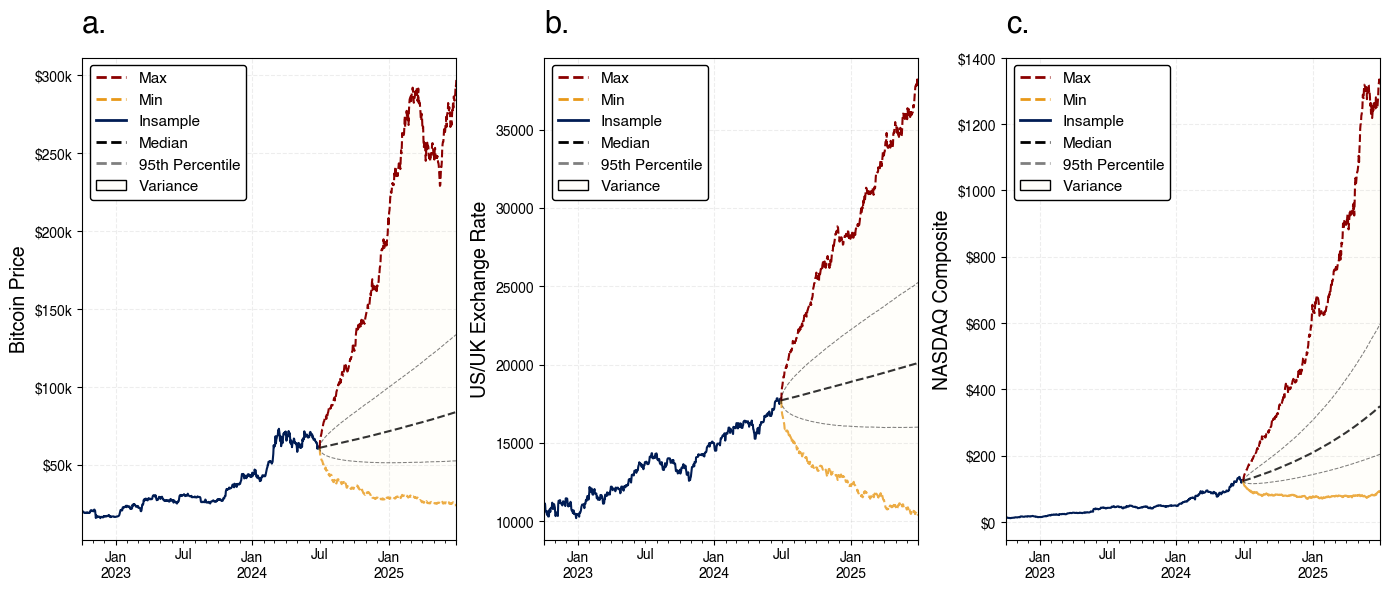

In [9]:
plot_three_rws()

And, then combine one Random walk example (i.e. USD/GBP), akin to [Meese and Rogoff (1983)](https://scholar.harvard.edu/files/rogoff/files/51_jie1983.pdf). The second example replicates the agent based model of [Schelling (1969)](https://www.jstor.org/stable/1823701).

[*********************100%%**********************]  1 of 1 completed


The minimum USUK RW forecast is: 0.6344813157389798
The maximum USUK RW forecast is: 1.0718573382939551
The median RW forecast is: 0.8284735406215726
15.0 42.0


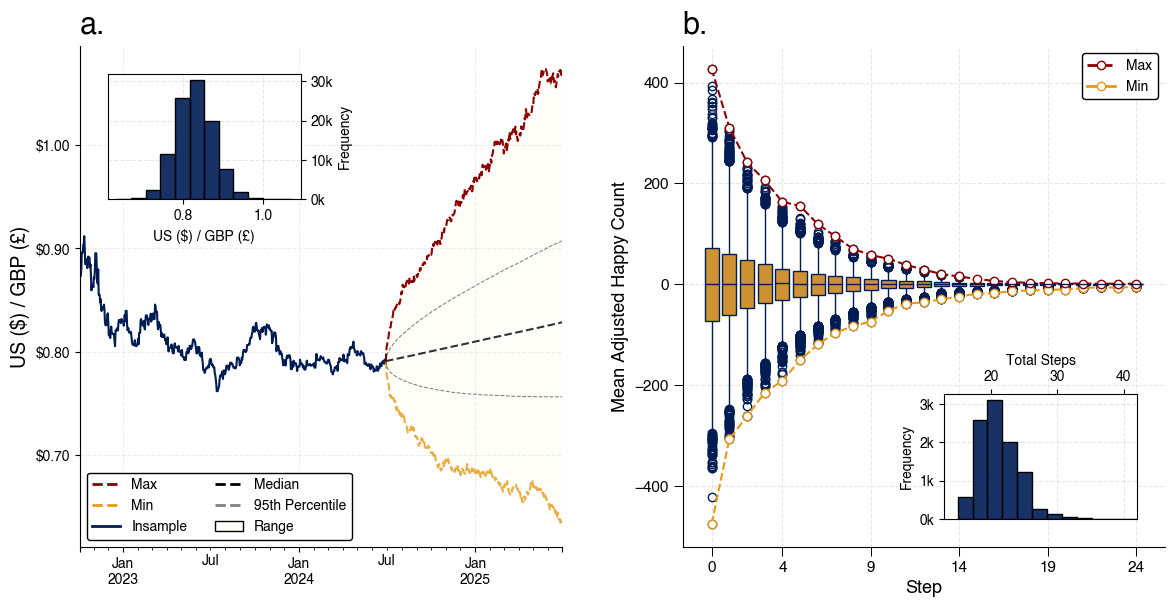

In [10]:
plot_further_examples()

#### Section 3.4

Finally, we utilise the immensely popular BERTopic algorithm by of Grootendorst (2022), available here [here](https://arxiv.org/pdf/2203.05794.pdf). In these examples, we use four sets of abstracts obtained from [dimensions.ai](https://www.dimensions.ai/). The abstracts which are thusly topic modelled are from the journals:
    
    * Science
    * The New England Journal of Medicine
    * PNAS
    * Nature
    * SHAPE
    * Population Studies

The latter two examples are direct replications of the [SHAPE of Impact](https://apo.org.au/node/325418) and the [Population Studies at 75 Years](https://www.tandfonline.com/doi/pdf/10.1080/00324728.2021.1996624) review. These examples generally relate to the work of [Asmussen and Charles Møller (2019)](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0255-7).

Science mean number of topics: 240.2947052947053
Science min number of topics: 5
Science max number of topics: 629
NEJM mean number of topics: 145.61838161838162
NEJM min number of topics: 4
NEJM max number of topics: 236
PNAS mean number of topics: 240.2947052947053
PNAS min number of topics: 5
PNAS max number of topics: 629
Nature mean number of topics: 145.61838161838162
Nature min number of topics: 4
Nature max number of topics: 236
SHAPE mean number of topics: 49.77022977022977
SHAPE min number of topics: 3
SHAPE max number of topics: 84
Population Studies mean number of topics: 22.58841158841159
Population Studies min number of topics: 2
Population Studies max number of topics: 38


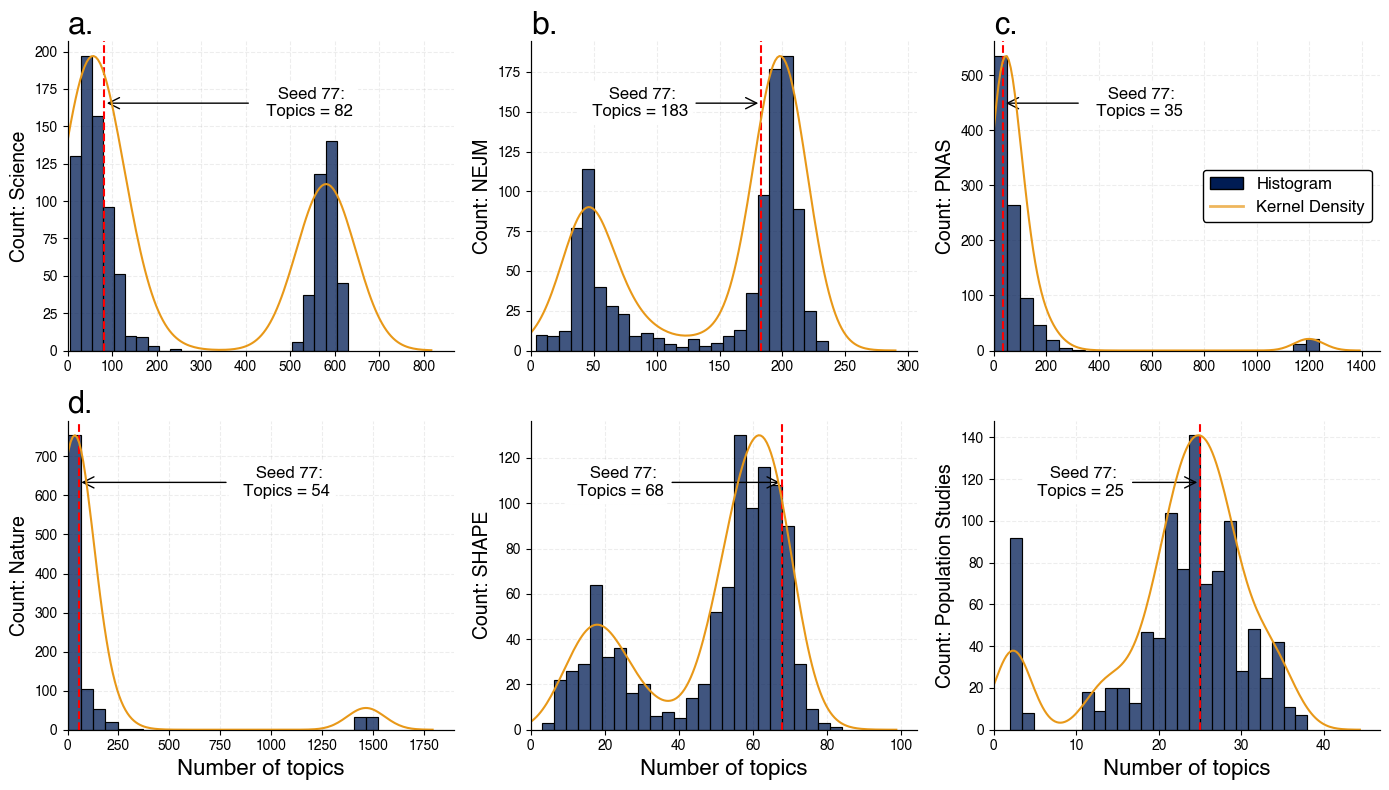

In [11]:
plot_topics_barplot(figure_path)

#### Section 4

Lets now conduct some very basic scientometric analysis which helps us understand which disciplines are discussing random numbers, and when.

In [12]:
df_rng, df_hrng, df_qrng, df_prng, df_quarng, df_yr, df_yr_dom, df_dom = load_scientometrics()

In [13]:
desc_print_scientometrics(df_rng, df_hrng, df_qrng, df_prng, df_quarng)

We have 640205 papers for "random number").
Modal journal: Journal of biological chemistry/The Journal of biological chemistry (6569 papers)
Modal subfield: Plant Science (26293 papers)
Modal field: Medicine (211076 papers)
Modal domain: Health Sciences (238826 papers)

We have 5683 papers for "random number" and "hardware").
Modal journal: IET communications (130 papers)
Modal subfield: Computer Vision and Pattern Recognition (918 papers)
Modal field: Computer Science (3333 papers)
Modal domain: Physical Sciences (4912 papers)

We have 7984 papers for "random number" and "quantum").
Modal journal: Journal of biological chemistry/The Journal of biological chemistry (438 papers)
Modal subfield: Artificial Intelligence (2577 papers)
Modal field: Computer Science (3381 papers)
Modal domain: Physical Sciences (6977 papers)

We have 8412 papers for "random number" and "pseudo").
Modal journal: Journal of biological chemistry/The Journal of biological chemistry (233 papers)
Modal subfi

In [14]:
make_table(df_rng, df_hrng, df_qrng, df_prng, df_quarng, 'field')

,"""Random Numbers""","""Random Numbers"" and ""Hardware""","""Random Numbers"" and ""Quantum""","""Random Numbers"" and ""Pseudo""","""Random Numbers"" and ""Quasi"""
field,,,,,
Medicine,211076,329,223.0,586,1939
Computer Science,77029,3333,3381.0,4222,918
Agricultural and Biological Sciences,59928,19,98.0,147,97
Engineering,50239,1311,457.0,1263,848
"Biochemistry, Genetics and Molecular Biology",43046,131,340.0,394,226
Mathematics,24398,24,337.0,357,716
Social Sciences,22165,56,46.0,69,886
Environmental Science,18482,44,34.0,172,160
Physics and Astronomy,18336,136,2401.0,349,543


In [15]:
df_dom.loc[0, 'domain'] = 'Life Sciences'
df_dom.loc[1, 'domain'] = 'Social Sciences'
df_dom.loc[2, 'domain'] = 'Physical Sciences'
df_dom.loc[3, 'domain'] = 'Health Sciences'
df_dom = df_dom.set_index('domain')
domain_df = make_table(df_rng, df_hrng, df_qrng, df_prng, df_quarng, 'domain')
domain_df = domain_df.div(df_dom['count'], axis=0)*100
domain_df.to_csv('../figures/domain_table.csv')
domain_df

,"""Random Numbers""","""Random Numbers"" and ""Hardware""","""Random Numbers"" and ""Quantum""","""Random Numbers"" and ""Pseudo""","""Random Numbers"" and ""Quasi"""
domain,,,,,
Health Sciences,0.406852,0.000646,0.000407,0.001094,0.004201
Life Sciences,0.292207,0.000516,0.001336,0.001785,0.001202
Physical Sciences,0.224887,0.005433,0.007717,0.007263,0.003884
Social Sciences,0.091509,0.000216,0.000242,0.000552,0.002424


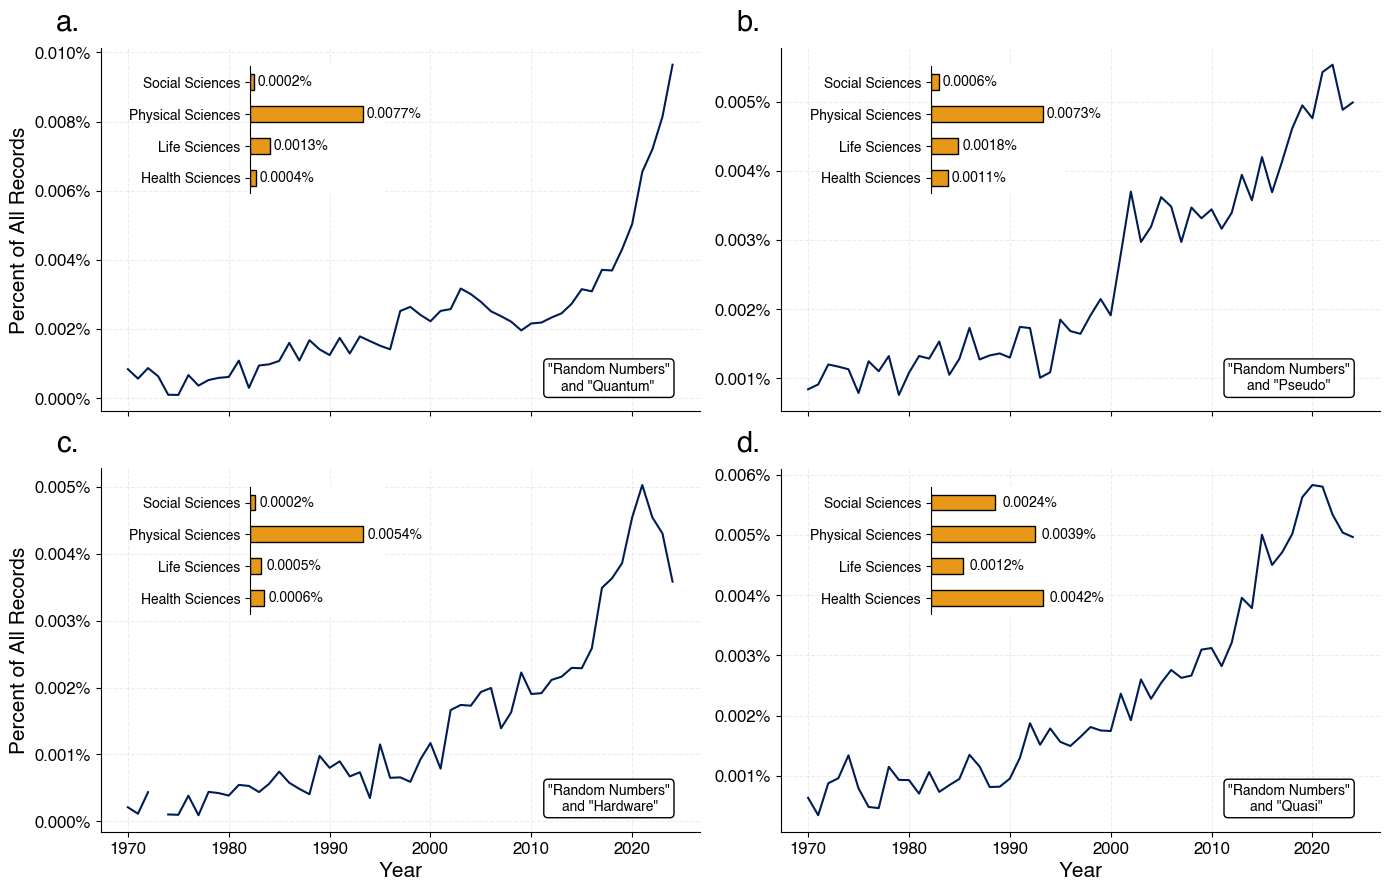

In [16]:
plot_scientometrics(figure_path, domain_df)

In [17]:
df_rng, df_hrng, df_qrng, df_prng, df_quarng, df_yr, df_yr_dom, df_dom = load_scientometrics()
df_yr = make_scientometric_ts(df_rng, df_hrng, df_qrng, df_prng, df_quarng, df_yr, domain_df)
df_yr = df_yr.set_index('year')
for rng_type in ['RNG_count', 'HRNG_count', 'QRNG_count', 'PRNG_count', 'QUASI_count']:
    print('The percent of OpenAlex which is focused on ' + rng_type.split('_')[0] +
          ' in year 1970 is ' + str(df_yr.loc[1970, rng_type].round(4)))
    print('The percent of OpenAlex which is focused on ' + rng_type.split('_')[0] +
          ' in year 2020 is ' + str(df_yr.loc[2020, rng_type].round(4)))

The percent of OpenAlex which is focused on RNG in year 1970 is 0.0716
The percent of OpenAlex which is focused on RNG in year 2020 is 0.3827
The percent of OpenAlex which is focused on HRNG in year 1970 is 0.0002
The percent of OpenAlex which is focused on HRNG in year 2020 is 0.0045
The percent of OpenAlex which is focused on QRNG in year 1970 is 0.0008
The percent of OpenAlex which is focused on QRNG in year 2020 is 0.005
The percent of OpenAlex which is focused on PRNG in year 1970 is 0.0008
The percent of OpenAlex which is focused on PRNG in year 2020 is 0.0048
The percent of OpenAlex which is focused on QUASI in year 1970 is 0.0006
The percent of OpenAlex which is focused on QUASI in year 2020 is 0.0058


#### Section 5

That is not to say that these are all of the times when random states can have dramatic effects on estimand outputs. Indeed, the set of _types_ where the effects are huge are far greater than the sparse number of examples which we show as part of this project. This is just a compactly presented set which makes dissemination of our message easiest!

Please don't hesitate to get in contact with any other examples which you can think of, or raise bugs if you find any issues!